## Library and Data Imports

In [1]:
import pandas as pd
import lasio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
las = lasio.read("Data/15-9-19_SR_COMP.LAS")

In [3]:
df = las.df()
df.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


In [4]:
df.reset_index(inplace=True)
df.rename(columns={'DEPT':'DEPTH'}, inplace=True)
df.head()

,DEPTH,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
1,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
2,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
3,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
4,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


## Data Plotting
### Simple Plot Fills

(4400.0, 4000.0)

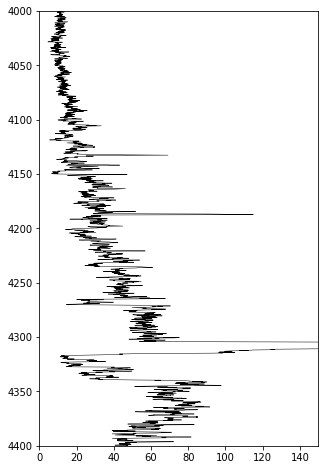

In [5]:
#Setup figure and plot
plt.figure(figsize=(5,8))
plt.plot(df['GR'], df['DEPTH'], c='black', lw=0.5)
#Setup axes limits
plt.xlim(0,150)
plt.ylim(4400, 4000)

(4400.0, 4000.0)

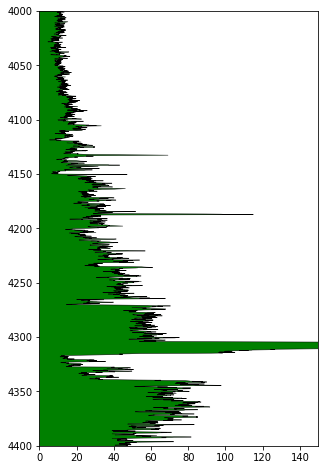

In [6]:
plt.figure(figsize=(5,8))
plt.plot(df['GR'], df['DEPTH'], c='black', lw=0.5)

# Add fill_betweenx
plt.fill_betweenx(df['DEPTH'], 0, df['GR'], facecolor='green')

plt.xlim(0, 150)
plt.ylim(4400, 4000)

#### fill_betweenx on Both Sides of Line

(4400.0, 4000.0)

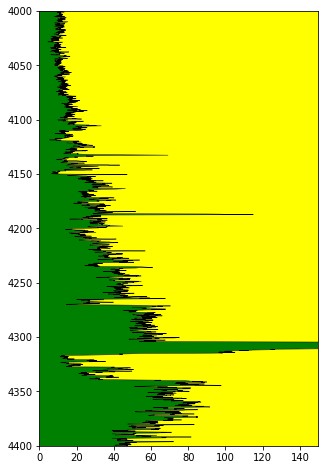

In [7]:
plt.figure(figsize=(5,8))
plt.plot(df['GR'], df['DEPTH'], c='black', lw=0.5)

#Add fill_betweenx to left
plt.fill_betweenx(df['DEPTH'], 0, df['GR'], facecolor='green')

#Add fill_betweenx to right
plt.fill_betweenx(df['DEPTH'], df['GR'], 150, facecolor='yellow')


plt.xlim(0, 150)
plt.ylim(4400, 4000)

#### Fill To a Fixed Value

(4400.0, 4000.0)

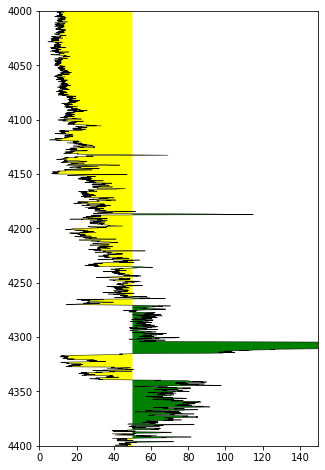

In [8]:
plt.figure(figsize=(5,8))
plt.plot(df['GR'], df['DEPTH'], c='black', lw=0.5)

# Using the where argument to fill to a fixed value
plt.fill_betweenx(df['DEPTH'], 50, df['GR'], where=df['GR']<=50, facecolor='yellow')
plt.fill_betweenx(df['DEPTH'], df['GR'], 50, where=df['GR']>=50, facecolor='green')


plt.xlim(0, 150)
plt.ylim(4400, 4000)

## Color Map Fills

#### Variable Fill to the Left

In [9]:
# Setup plot vlaues & color_index
left_value = 0
right_value = 150
span = abs(left_value-right_value)

cmap=plt.get_cmap('hot_r')

color_index = np.arange(left_value, right_value, span/100)

In [13]:
color_index

array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
        13.5,  15. ,  16.5,  18. ,  19.5,  21. ,  22.5,  24. ,  25.5,
        27. ,  28.5,  30. ,  31.5,  33. ,  34.5,  36. ,  37.5,  39. ,
        40.5,  42. ,  43.5,  45. ,  46.5,  48. ,  49.5,  51. ,  52.5,
        54. ,  55.5,  57. ,  58.5,  60. ,  61.5,  63. ,  64.5,  66. ,
        67.5,  69. ,  70.5,  72. ,  73.5,  75. ,  76.5,  78. ,  79.5,
        81. ,  82.5,  84. ,  85.5,  87. ,  88.5,  90. ,  91.5,  93. ,
        94.5,  96. ,  97.5,  99. , 100.5, 102. , 103.5, 105. , 106.5,
       108. , 109.5, 111. , 112.5, 114. , 115.5, 117. , 118.5, 120. ,
       121.5, 123. , 124.5, 126. , 127.5, 129. , 130.5, 132. , 133.5,
       135. , 136.5, 138. , 139.5, 141. , 142.5, 144. , 145.5, 147. ,
       148.5])

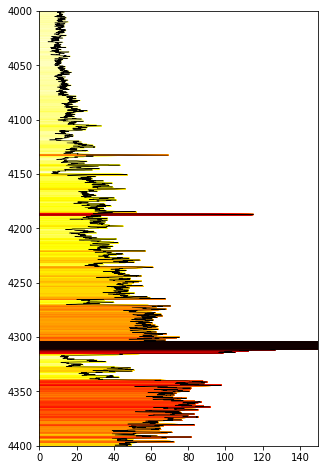

In [15]:
plt.figure(figsize=(5,8))
plt.plot(df['GR'], df['DEPTH'], c='black', lw=0.5)

plt.xlim(0, 150)
plt.ylim(4400, 4000)

for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value)
#     print(f'{index}\t{index_value}\t{color}')
    plt.fill_betweenx(df['DEPTH'], left_value, df['GR'], where=df['GR']>=index, color=color)

#### Variable Fill to the Right

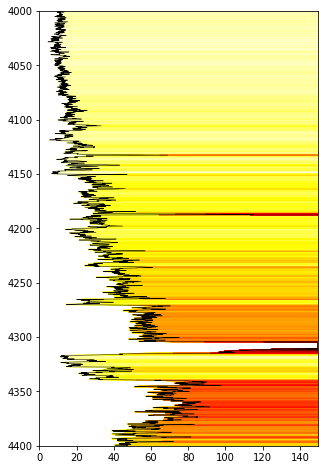

In [16]:
plt.figure(figsize=(5,8))
plt.plot(df['GR'], df['DEPTH'], c='black', lw=0.5)

plt.xlim(0, 150)
plt.ylim(4400, 4000)

for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value)
    
    plt.fill_betweenx(df['DEPTH'], right_value, df['GR'], where= df['GR']>=index, color = color)